In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [14]:
data = pd.read_csv('data/data.csv')

In [15]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
x = data.drop(columns=['math score'], axis = 1)

In [18]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [19]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [20]:
y = data['math score']

In [21]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [23]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprscessor = ColumnTransformer(
[

    ('OneHotEncoder', oh_transformer, cat_features),
    ('StandardScaler', numeric_transformer, num_features),

]

)


In [24]:
x = preprscessor.fit_transform(x)

In [25]:
x.shape

(1000, 19)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [41]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print('- Root Mean Squared Error :{:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('-------------------------------------------------')

    print('Model performance for Test set')
    print('- Root Mean Squared Error :{:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


    







LinearRegression()

LinearRegression
Model performance for Training set
- Root Mean Squared Error :5.3413
- Mean Absolute Error: 4.2638
- R2 Score: 0.8742
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :5.3027
- Mean Absolute Error: 4.1861
- R2 Score: 0.8829




Lasso()

Lasso
Model performance for Training set
- Root Mean Squared Error :6.5653
- Mean Absolute Error: 5.2189
- R2 Score: 0.8100
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :6.5471
- Mean Absolute Error: 5.0530
- R2 Score: 0.8215




Ridge()

Ridge
Model performance for Training set
- Root Mean Squared Error :5.3415
- Mean Absolute Error: 4.2640
- R2 Score: 0.8742
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :5.3081
- Mean Absolute Error: 4.1851
- R2 Score: 0.8826




KNeighborsRegressor()

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error :5.8202
- Mean Absolute Error: 4.6238
- R2 Score: 0.8507
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :6.9446
- Mean Absolute Error: 5.3290
- R2 Score: 0.7991




DecisionTreeRegressor()

Decision Tree
Model performance for Training set
- Root Mean Squared Error :0.3717
- Mean Absolute Error: 0.0238
- R2 Score: 0.9994
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :8.8250
- Mean Absolute Error: 6.9925
- R2 Score: 0.6756




RandomForestRegressor()

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error :2.3086
- Mean Absolute Error: 1.8132
- R2 Score: 0.9765
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :6.2635
- Mean Absolute Error: 4.8266
- R2 Score: 0.8366




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

XGBRegressor
Model performance for Training set
- Root Mean Squared Error :0.9954
- Mean Absolute Error: 0.6536
- R2 Score: 0.9956
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :6.6990
- Mean Absolute Error: 5.3215
- R2 Score: 0.8131




CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error :2.9682
- Mean Absolute Error: 2.3522
- R2 Score: 0.9612
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :6.1125
- Mean Absolute Error: 4.6838
- R2 Score: 0.8444




AdaBoostRegressor()

AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error :5.7888
- Mean Absolute Error: 4.7648
- R2 Score: 0.8523
-------------------------------------------------
Model performance for Test set
- Root Mean Squared Error :7.0306
- Mean Absolute Error: 5.3557
- R2 Score: 0.7941




In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['Model Nmae', 'R2_Score']).sort_values(by = ['R2_Score'], ascending= False)

,Model Nmae,R2_Score
0,LinearRegression,0.882874
2,Ridge,0.882637
7,CatBoosting Regressor,0.844369
5,Random Forest Regressor,0.836589
1,Lasso,0.821451
6,XGBRegressor,0.813071
3,K-Neighbors Regressor,0.799113
8,AdaBoost Regressor,0.794109
4,Decision Tree,0.675595


In [43]:
lin_model = LinearRegression(fit_intercept= True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(' Accuracy of the model is %.2f' %score)

 Accuracy of the model is 88.29


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

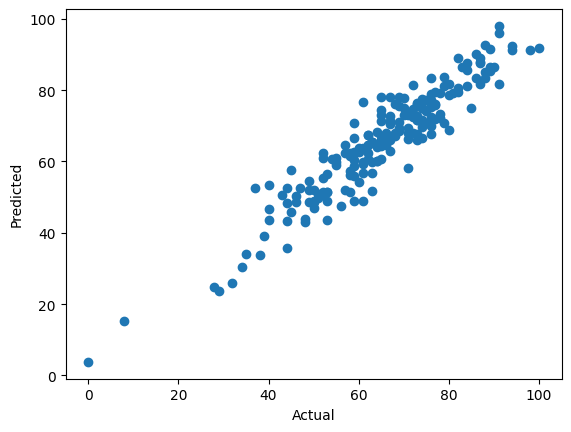

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

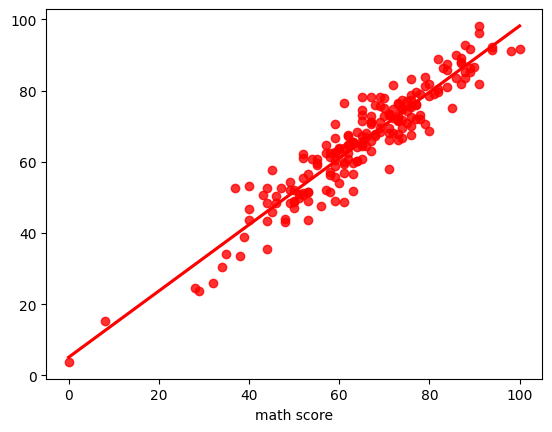

In [45]:
sns.regplot(x = y_test, y = y_pred, ci = None, color='red')

In [47]:
pred_data = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value': y_pred, 'Diffrenc': y_test - y_pred})
pred_data

,Actual Value,Predicted Value,Diffrenc
866,59,55.797327,3.202673
191,76,83.285193,-7.285193
732,87,81.854104,5.145896
657,69,69.374495,-0.374495
155,70,77.880314,-7.880314
...,...,...,...
417,74,74.871904,-0.871904
239,84,85.672903,-1.672903
75,44,43.324033,0.675967
623,100,91.784218,8.215782
